In [1]:
%matplotlib inline
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
records = pd.read_csv('../../data/cleaned_texts_oct19_2016.tsv', sep='\t')

In [3]:
records.head(1)

,Unnamed: 0,Unnamed: 0.1,control_number,title,uniform_title,author,publisher,pub_location,pub_year,translation,prev_language,slug,canonical_city,canonical_country,text_slug,full_text_slug
0,0,0,1000686,chao,NaN,"sauvajon, marc-gilbert",escelicer,madrid,1972,NaN,fre,"madrid,spain",madrid,spain,"chao,sauvajon, marc-gilbert","chao,sauvajon, marc-gilbert,madrid,1972,escelicer"


In [4]:
plt.rcParams['figure.figsize'] = (16.0, 8.0)

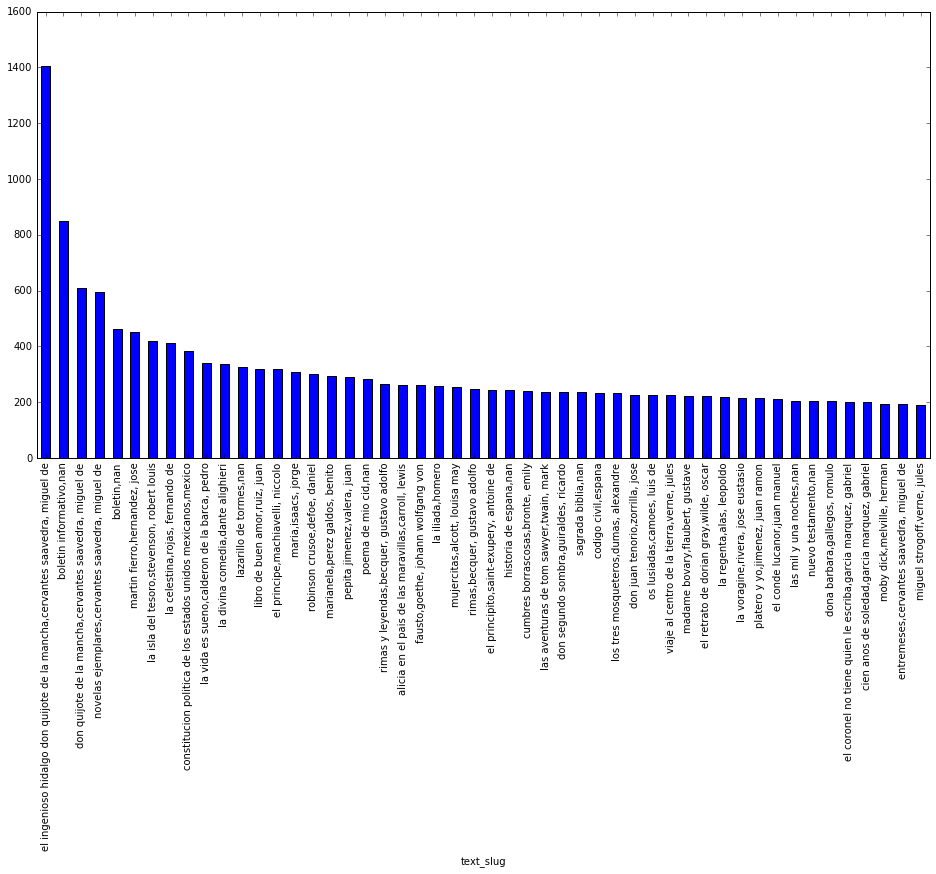

In [5]:
records.groupby('text_slug').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:50].plot(kind="bar")

In [6]:
len(records.groupby('text_slug').count()['control_number'])

5590534

In [7]:
d = {k: len(v) for k, v in records.groupby("text_slug").groups.items()}

def prob_dist(d):
    probs = {}
    for k, v in d.items():
        probs.setdefault(v, 0)
        probs[v] += 1
    return probs


probs = prob_dist(d)

In [8]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)

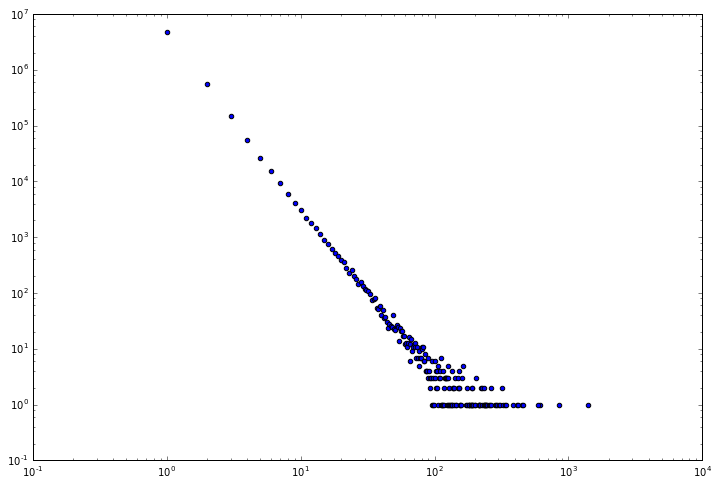

In [9]:
plt.xscale("log")
plt.yscale("log")
plt.scatter(list(probs.keys()), list(probs.values()))

In [10]:
top_slugs = records.groupby('text_slug').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:50].index

In [11]:
top_slugs

Index(['el ingenioso hidalgo don quijote de la mancha,cervantes saavedra, miguel de',
       'boletin informativo,nan',
       'don quijote de la mancha,cervantes saavedra, miguel de',
       'novelas ejemplares,cervantes saavedra, miguel de', 'boletin,nan',
       'martin fierro,hernandez, jose',
       'la isla del tesoro,stevenson, robert louis',
       'la celestina,rojas, fernando de',
       'constitucion politica de los estados unidos mexicanos,mexico',
       'la vida es sueno,calderon de la barca, pedro',
       'la divina comedia,dante alighieri', 'lazarillo de tormes,nan',
       'libro de buen amor,ruiz, juan', 'el principe,machiavelli, niccolo',
       'maria,isaacs, jorge', 'robinson crusoe,defoe, daniel',
       'marianela,perez galdos, benito', 'pepita jimenez,valera, juan',
       'poema de mio cid,nan', 'rimas y leyendas,becquer, gustavo adolfo',
       'alicia en el pais de las maravillas,carroll, lewis',
       'fausto,goethe, johann wolfgang von', 'la iliada,homero

In [18]:
top_producers = records[records.text_slug.isin(top_slugs)]

In [23]:
group_top_producers = top_producers.sort_values('pub_year').groupby(['text_slug', 'pub_year']).count()['control_number']

In [26]:
top_producer_df1 = pd.DataFrame({
    'el ingenioso hidalgo don quijote de la mancha,cervantes saavedra, miguel de': group_top_producers.ix['el ingenioso hidalgo don quijote de la mancha,cervantes saavedra, miguel de'],
    'novelas ejemplares,cervantes saavedra, miguel de': group_top_producers.ix['novelas ejemplares,cervantes saavedra, miguel de'],
    'don quijote de la mancha,cervantes saavedra, miguel de': group_top_producers.ix['don quijote de la mancha,cervantes saavedra, miguel de'],
    'martin fierro,hernandez, jose': group_top_producers.ix['martin fierro,hernandez, jose'],
    'la celestina,rojas, fernando de': group_top_producers.ix['la celestina,rojas, fernando de'],
    'libro de buen amor,ruiz, juan': group_top_producers.ix['libro de buen amor,ruiz, juan'],
    'la isla del tesoro,stevenson, robert louis': group_top_producers.ix['la isla del tesoro,stevenson, robert louis'],
    'constitucion politica de los estados unidos mexicanos,mexico': group_top_producers.ix['constitucion politica de los estados unidos mexicanos,mexico'],
    'la vida es sueno,calderon de la barca, pedro': group_top_producers.ix['la vida es sueno,calderon de la barca, pedro'],
    'poema de mio cid,nan': group_top_producers.ix['poema de mio cid,nan'],
    }).fillna(0)

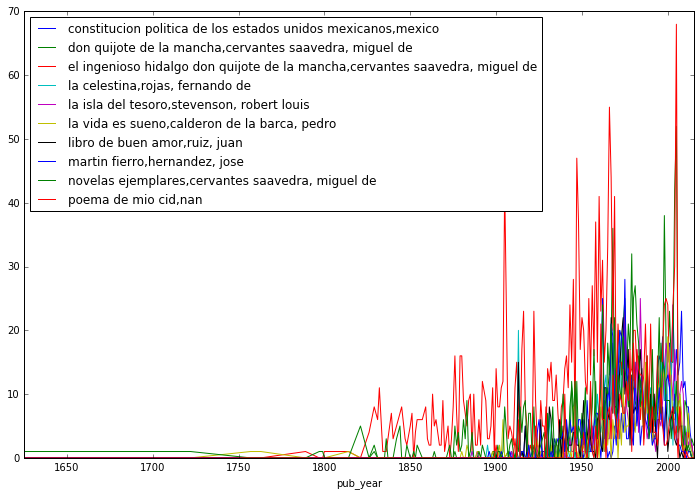

In [27]:
top_producer_df1.plot()

In [29]:
top_producer_df2 = pd.DataFrame({
    'lazarillo de tormes,nan': group_top_producers.ix['lazarillo de tormes,nan'],
    'la divina comedia,dante alighieri': group_top_producers.ix['la divina comedia,dante alighieri'],
    'maria,isaacs, jorge': group_top_producers.ix['maria,isaacs, jorge'],
    'pepita jimenez,valera, juan': group_top_producers.ix['pepita jimenez,valera, juan'],
    'el principe,machiavelli, niccolo': group_top_producers.ix['el principe,machiavelli, niccolo'],
    'robinson crusoe,defoe, daniel': group_top_producers.ix['robinson crusoe,defoe, daniel'],
    'marianela,perez galdos, benito': group_top_producers.ix['marianela,perez galdos, benito'],
    'don segundo sombra,guiraldes, ricardo': group_top_producers.ix['don segundo sombra,guiraldes, ricardo'],
    'episodios nacionales,perez galdos, benito': group_top_producers.ix['episodios nacionales,perez galdos, benito'],
    'rimas,becquer, gustavo adolfo': group_top_producers.ix['rimas,becquer, gustavo adolfo'],
}).fillna(0)

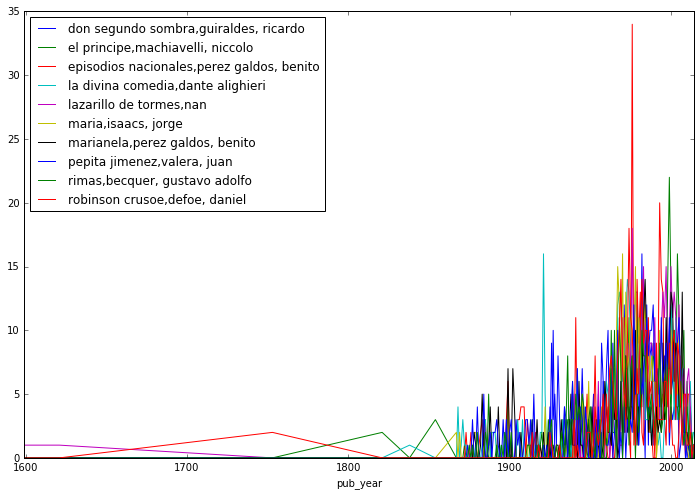

In [30]:
top_producer_df2.plot()

In [ ]:
top_producer_df3 = pd.DataFrame({
    'sagrada biblia,nan': group_top_producers.ix['sagrada biblia,nan'],
    'la regenta,alas, leopoldo': group_top_producers.ix['la regenta,alas, leopoldo'],
    'fausto,goethe, johann wolfgang von': group_top_producers.ix['fausto,goethe, johann wolfgang von'],
    'rimas y leyendas,becquer, gustavo adolfo': group_top_producers.ix['rimas y leyendas,becquer, gustavo adolfo'],
    'summa artishistoria general del arte,pijoan, jose': group_top_producers.ix['summa artishistoria general del arte,pijoan, jose'],
    'cien anos de soledad,garcia marquez, gabriel': group_top_producers.ix['cien anos de soledad,garcia marquez, gabriel'],
    'alicia en el pais de las maravillas,carroll, lewis': group_top_producers.ix['alicia en el pais de las maravillas,carroll, lewis'],
    'historia verdadera de la conquista de la nueva espana,diaz del castillo, bernal': group_top_producers.ix['historia verdadera de la conquista de la nueva espana,diaz del castillo, bernal'],
    'derecho civil espanol, comun y foral,castan tobenas, jose': group_top_producers.ix['derecho civil espanol, comun y foral,castan tobenas, jose'],
    'obras completas,ortega y gasset, jose': group_top_producers.ix['obras completas,ortega y gasset, jose'],
}).fillna(0)

In [ ]:
# top_producer_df3.plot()

In [31]:
top_producer_df4 = pd.DataFrame({
    'los tres mosqueteros,dumas, alexandre': group_top_producers.ix['los tres mosqueteros,dumas, alexandre'],
    'mujercitas,alcott, louisa may': group_top_producers.ix['mujercitas,alcott, louisa may'],
    'la voragine,rivera, jose eustasio': group_top_producers.ix['la voragine,rivera, jose eustasio'],
    'cumbres borrascosas,bronte, emily': group_top_producers.ix['cumbres borrascosas,bronte, emily'],
    'el principito,saint-exupery, antoine de': group_top_producers.ix['el principito,saint-exupery, antoine de'],
    'don juan tenorio,zorrilla, jose': group_top_producers.ix['don juan tenorio,zorrilla, jose'],
    'dona barbara,gallegos, romulo': group_top_producers.ix['dona barbara,gallegos, romulo'],
    'el conde lucanor,juan manuel': group_top_producers.ix['el conde lucanor,juan manuel'],
    'os lusiadas,camoes, luis de': group_top_producers.ix['os lusiadas,camoes, luis de'],
    'entremeses,cervantes saavedra, miguel de': group_top_producers.ix['entremeses,cervantes saavedra, miguel de'],
    'las aventuras de tom sawyer,twain, mark': group_top_producers.ix['las aventuras de tom sawyer,twain, mark'],
}).fillna(0)

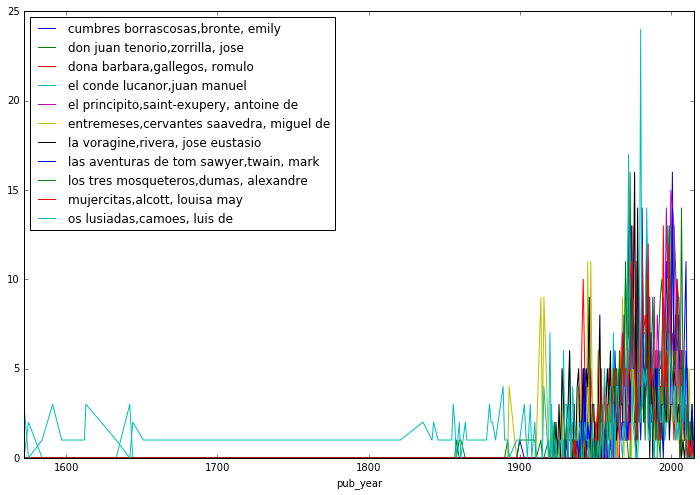

In [32]:
top_producer_df4.plot()

In [ ]:
top_producer_df5 = pd.DataFrame({
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
}).fillna(0)

In [ ]:
# top_producer_df5.plot()